In [1]:
# To interface with Excel
library(openxlsx)

# For data manipulation & visualization
library(tidyverse)

# For "tidying" regression output
library(broom)

# To get the diamonds dataset
library(ggplot2)

head(diamonds)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'broom' was built under R version 3.6.3"


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### The `data` worksheet

First we'll set up objects referring to our workbook and worksheet, respectively. 

In [2]:
# Add workbook
wb <- createWorkbook()

# Add worksheet of raw data
data_sheet <- addWorksheet(wb, sheetName = 'data')

Next, we'll use the `writeDataTable()` function to write `mpg` to this worksheet as an Excel table. 

In [3]:
# Exclude row names
writeDataTable(wb, sheet = data_sheet, x = diamonds, rowNames = FALSE)

### The `analysis` worksheet

I would also like to include an `analysis` worksheet including regression results and a scatterplot of the relationship between `mpg` and `weight`. 

We can set up a new worksheet, add the results of the regression with `writeData()` and add the scatterplot with `writePlot()` 

In [5]:
# Set up a new worksheet 
analysis_sheet <- addWorksheet(wb, sheetName = 'analysis')

In [5]:
diamonds_lm <- lm(price ~ carat, data = diamonds)
diamonds_lm_tidy <- tidy(diamonds_lm)
diamonds_lm_tidy

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2256.361,13.05535,-172.8304,0
carat,7756.426,14.06658,551.4081,0


In [ ]:
diamonds

In [ ]:
names(diamonds)

In [ ]:
pairs(diamonds)

In [ ]:
# Visualize the results
ggplot(data = diamonds, aes(x = carat, y = price)) +
    geom_point() +
    geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in "Workbook" %in% class(wb): object 'wb' not found


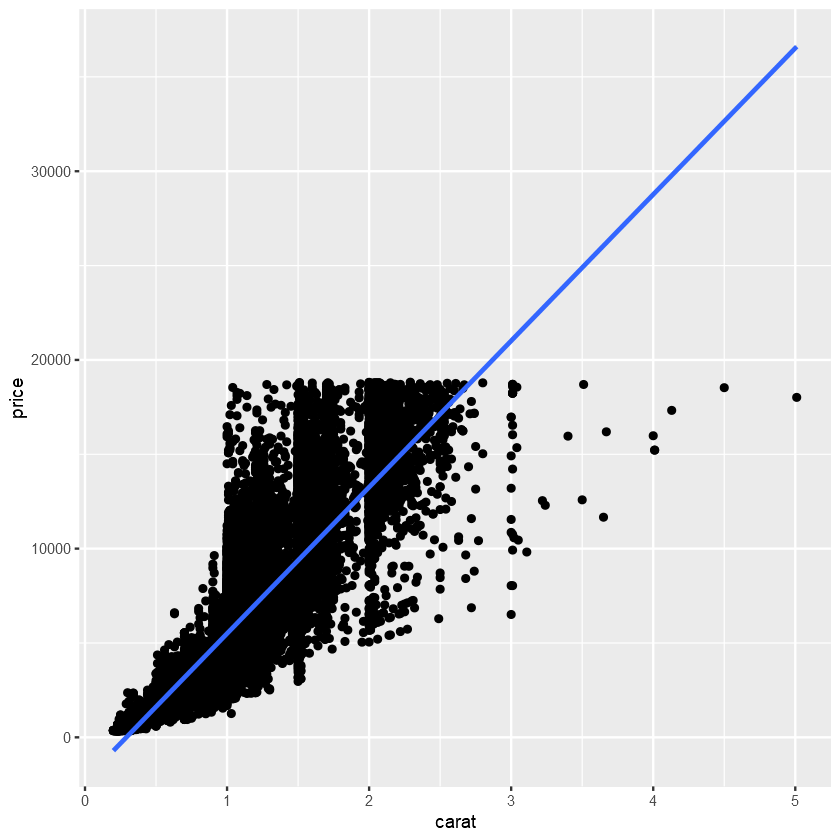

In [6]:
# Visualize the results
ggplot(data = diamonds, aes(x = carat, y = price)) +
    geom_point() +
    geom_smooth(method = 'lm')

# Add the image to the worksheet, set the placement
insertPlot(wb, sheet = analysis_sheet, startRow = 5, startCol = "A", width = 4, height = 4)

### Admire our work, part 1

OK, let's save and view our work. By default, `saveWorkbook()` will put the file in our working directory.

Let's take a look at the finished output in Excel.

In [8]:
mpg_report = 'mpg-report.xlsx'

# save workbook to working directory
saveWorkbook(wb = wb, file = mpg_report, overwrite = TRUE)

It's pretty good! But as a matter of fact I would like to do a few more things to the workbook:

- Freeze panes in each worksheet
- Autofit the column widths in each worksheet
- Format the `weight` column in thousands and `acceleration` with a decimal in the `data` worksheet. 

The connection from R to our workbook is still open in our session; as long as our workbook remains closed, these additinoal changes will be applied to the workbook.

Let's give it a go:

In [9]:
for (sheet in getSheetNames(mpg_report)){
    freezePane(wb, sheet = sheet, firstRow = TRUE)
}

In [10]:
thousands <- createStyle(numFmt = "#,##0")

addStyle(wb, sheet = data_sheet, style = thousands, cols = which(colnames(mpg) == 'weight'), 2:(nrow(mpg) + 1))

In [11]:
setColWidths(wb, sheet = data_sheet, cols = ncol(mpg), widths = "auto")

Let's try this again!

This time, let's use `openXL()` to launch the workbook directly from R.

In [12]:
mpg_report = 'mpg-report.xlsx'

saveWorkbook(wb = wb, file = mpg_report, overwrite = TRUE)

openXL(mpg_report)

### Encore: write to multiple workbooks

Finally, we can write to multiple worksheets by nesting the data frame and then iterating on it. We'll use the `write.xlsx()` function which allows us to write directly to a workbook without defining it.

In [13]:
mpg %>%
  nest(-origin) %>%
  pwalk(~write.xlsx(x = .y, file = paste0(.x, ".xlsx"), asTable = TRUE) )

Warning message:
"All elements of `...` must be named.
Did you want `data = c(mpg, cylinders, displacement, horsepower, weight, acceleration, 
    model_year, name)`?"


# Questions?

# Recommended resources:  



## 1. `browseVignettes()`

In [ ]:
# This takes a while to run in Jupyter...
browseVignettes(package = c('readxl', 'openxlsx'))

## 2. [R & Excel -- LondonR meetup presentation by UBS analysts](https://www.londonr.org/wp-content/uploads/sites/2/presentations/LondonR_-_R_&_Excel_-_David_Jessop_-_20170713.pdf)


![UBS R Excel](images/ubs-r-excel.png)

## 3. In case you're interested in running R on Jupyter:

- Download [Anaconda Individual Edition](https://www.anaconda.com/products/individual)
- Download `IRkernel` package from CRAN ([instructions here](https://irkernel.github.io/installation/))

## 4. In case you're interested in running R on Binder:

- You need a `runtime.txt` file and optionally an `install.R` file
- [Full instructions here](https://github.com/binder-examples/r)

## 4. In case you're interested in "Python-Powered Excel"

- _Python for Excel_ by Felix Zumstein (forthcoming, O'Reilly Media)


![Python for Excel cover](images/python-for-excel.jpg)

# THANK YOU

### George Mount
### Stringfest Analytics
### [stringfestanalytics.com](https://georgejmount.com)
### [linkedin.com/in/gjmount](https://www.linkedin.com/in/gjmount/)
